In [1]:
from reprophylo import *

Download all available 12S sequences for a list of UK reptile taxa from Genbank.

The list of binomial species names was prepared in a simple text file: UK_Reptile_Species_List.txt.

In [2]:
!head ./UK_Reptile_Species_List.txt

Anguis fragilis
Coronella austriaca 
Elaphe longissima
Natrix natrix 
Natrix tessellata
Lacerta agilis 
Lacerta viridis
Podarcis muralis
Zootoca vivipara 
Vipera berus 


In [3]:
!fetch_from_db.py -t UK_Reptile_Species_List.txt -m 12S -o UK_reptile_12S_Genbank_raw -@ L.Harper@2015.hull.ac.uk


metaBEAT may be querying NCBI's Entrez databases to fetch/verify taxonomic ids. Entrez User requirements state that you need to identify yourself by providing an email address so that NCBI can contact you in case there is a problem.

You have specified: 'L.Harper@2015.hull.ac.uk'


QUERYING GENBANK

check for synonyms for "12S" (this is relevant only for Genbank searches)

fetching accessions ..

#	Anguis fragilis	2
#	Caretta caretta	9
#	Chelonia mydas	15
#	Chelydra serpentina	8
#	Chrysemys picta	6
#	Coronella austriaca	2
#	Dermochelys coriacea	7
#	Elaphe longissima	3
#	Emys orbicularis	68
#	Eretmochelys imbricata	8
#	Lacerta agilis	8
#	Lacerta viridis	9
#	Lepidochelys kempii	3
#	Mauremys caspica	3
#	Natrix natrix	5
#	Natrix tessellata	0
#	Podarcis muralis	25
#	Trachemys scripta	17
#	Vipera berus	5
#	Zootoca vivipara	21

total number of accessions fetched: 224


downloading 224 records .. processing 1000 accessions per batch

[Wed Oct 26 2016 15:31:29]	batch: 0000001	224 unique record

Read reference sequences into ReproPhylo and filter to keep only proper 12S records.

In [4]:
list_loci_in_genbank('UK_reptile_12S_Genbank_raw.gb', # The input genbank file
                     'reptile_loci.csv',      # The loci file
                     'reptile_loci_counts.txt')

In [5]:
!cat reptile_loci_counts.txt


There are 72 gene names (or gene product names) detected
----------------------------------
Gene and count sorted by gene name
----------------------------------
1 instances of CDS,ATP synthase F0 subunit 6
1 instances of CDS,ATP synthase F0 subunit 8
44 instances of CDS,ATP6
43 instances of CDS,ATP8
1 instances of CDS,ATPase 6
1 instances of CDS,atpase 6
1 instances of CDS,atpase 8
1 instances of CDS,ATPase 8
2 instances of CDS,ATPase subunit 6
2 instances of CDS,ATPase subunit 8
1 instances of CDS,CO1
1 instances of CDS,CO2
1 instances of CDS,CO3
2 instances of CDS,COI
2 instances of CDS,COII
3 instances of CDS,COIII
41 instances of CDS,COX1
41 instances of CDS,COX2
41 instances of CDS,COX3
1 instances of CDS,COXI
1 instances of CDS,COXII
1 instances of CDS,COXIII
1 instances of CDS,Cytb
42 instances of CDS,CYTB
2 instances of CDS,cytb
5 instances of CDS,cytochrome b
1 instances of CDS,cytochrome c oxidase subunit I
1 instances of CDS,cytochrome c oxidase subunit II
1 instances of C

In [6]:
!cat reptile_loci.csv

dna,rRNA,12S_small_subunit_ribosomal_RNA,12S small subunit ribosomal RNA
dna,rRNA,16SrRNA,16SrRNA
dna,CDS,ATP_synthase_F0_subunit_6,ATP synthase F0 subunit 6
dna,CDS,ATP_synthase_F0_subunit_8,ATP synthase F0 subunit 8
dna,CDS,ATPase_6,ATPase 6
dna,CDS,ATPase_8,ATPase 8
dna,CDS,ATPase_subunit_6,ATPase subunit 6
dna,CDS,ATPase_subunit_8,ATPase subunit 8
dna,CDS,CO1,CO1
dna,CDS,CO2,CO2
dna,CDS,CO3,CO3
dna,CDS,COXI,COXI
dna,CDS,COXII,COXII
dna,CDS,COXIII,COXIII
dna,CDS,ERAL1,ERAL1
dna,CDS,MT-ATP6,ATP6,atpase 6
dna,CDS,MT-ATP8,ATP8,atpase 8
dna,CDS,MT-CO1,COI,COX1,cytochrome c oxidase subunit I
dna,CDS,MT-CO2,COII,COX2,cytochrome c oxidase subunit II
dna,CDS,MT-CO3,COIII,COX3,cytochrome c oxidase subunit III
dna,CDS,MT-CYB,Cytb,CYTB,cytb,cytochrome b
dna,CDS,MT-ND1,NADH dehydrogenase subunit 1,NADH dehydrogenase subunit I,NADH1,ND1
dna,CDS,MT-ND2,NADH dehydrogenase subunit 2,NADH dehydrogenase subunit II,NADH2,ND2
dna,CDS,MT-ND3,NADH dehydrogenase subunit 3,NADH dehydrogenase subunit III,NA

Extract all synonyms for '12S' and write to text file.

In [7]:
%%file reptile_target_locus.csv
dna,rRNA,rrnS,12S ribosomal RNA,12S rRNA,1
dna,rRNA,12S_ribosormal_RNA,12S ribosormal RNA,1
dna,rRNA,s-rRNA,s-rRNA,1

Writing reptile_target_locus.csv


In [8]:
!cat reptile_target_locus.csv

dna,rRNA,rrnS,12S ribosomal RNA,12S rRNA,1
dna,rRNA,12S_ribosormal_RNA,12S ribosormal RNA,1
dna,rRNA,s-rRNA,s-rRNA,1

Now, repeat process and create outgroups that can be used for tree construction as reference points for all amphibian sequences. *Xenopus laevis*, *Cottus gobio* and *Mus musculus*, are ideal outgroups and have been used in a well-referenced phylogenetic study of amphibians (Vidal *et al.* 2005; Shedlock *et al.* 2007; Townsend *et al.* 2008; Wiens *et al.* 2012; Pincheira-Donoso *et al.* 2013; Pyron *et al.* 2013; Reeder *et al.* 2015;). Other studies have used *Homo* but this would cause major problems downstream with laboratory contamination.

In [9]:
%%file outgroup.txt
Cottus gobio
Mus musculus
Xenopus laevis

Writing outgroup.txt


In [10]:
!fetch_from_db.py -t ../fetch_clean_align_tree/outgroup.txt -m 12S -o outgroups -@ L.Harper@2015.hull.ac.uk


metaBEAT may be querying NCBI's Entrez databases to fetch/verify taxonomic ids. Entrez User requirements state that you need to identify yourself by providing an email address so that NCBI can contact you in case there is a problem.

You have specified: 'L.Harper@2015.hull.ac.uk'


QUERYING GENBANK

check for synonyms for "12S" (this is relevant only for Genbank searches)

fetching accessions ..

#	Cottus gobio	1
#	Mus musculus	217
#	Xenopus laevis	20

total number of accessions fetched: 238


downloading 238 records .. processing 1000 accessions per batch

[Wed Oct 26 2016 15:32:28]	batch: 0000001	238 unique records downloaded	-> outgroups.0000001.gb	(total: 238 (100.00 %); remaining: 0 -> DONE!)

Concatenate all files	-> outgroups.gb



In [11]:
list_loci_in_genbank('outgroups.gb', 'outgroup_list_of_loci.csv')

Could not find either gene or product in V00711.1
Could not find either gene or product in V00711.1
Could not find either gene or product in V00711.1
Could not find either gene or product in V00711.1
Could not find either gene or product in V00711.1
Could not find either gene or product in V00711.1
Could not find either gene or product in V00711.1
Could not find either gene or product in V00711.1
Could not find either gene or product in V00711.1
Could not find either gene or product in V00711.1
Could not find either gene or product in V00711.1
Could not find either gene or product in V00711.1
Could not find either gene or product in V00711.1
Could not find either gene or product in M10217.1
Could not find either gene or product in M10217.1
Could not find either gene or product in M10217.1
Could not find either gene or product in M10217.1
Could not find either gene or product in M10217.1
Could not find either gene or product in M10188.1
Could not find either gene or product in M10188.1


In [12]:
!cat outgroup_list_of_loci.csv

dna,rRNA,12S_ribosome_RNA,12S ribosome RNA
dna,rRNA,16S_ribosome_RNA,16S ribosome RNA
dna,CDS,ATP_synthase_F0_subunit_6,ATP synthase F0 subunit 6
dna,CDS,ATP_synthase_F0_subunit_8,ATP synthase F0 subunit 8
dna,CDS,ATPase_6,ATPase 6
dna,CDS,ATPase_8,ATPase 8
dna,CDS,ATPase_subunit_6,ATPase subunit 6
dna,CDS,Atp6,Atp6
dna,CDS,Atp8,Atp8
dna,CDS,COX1I,COX1I
dna,CDS,COXI,COXI
dna,CDS,COXII,COXII
dna,CDS,COXIII,COXIII
dna,CDS,Cldn23,Cldn23
dna,CDS,Co1,Co1
dna,CDS,Co2,Co2
dna,CDS,Co3,Co3
dna,CDS,Cyp2j6,Cyp2j6
dna,CDS,Cyp2j9,Cyp2j9
dna,CDS,Gtpbp3,Gtpbp3
dna,CDS,MT-ATP6,ATP6,ATPase6
dna,CDS,MT-ATP8,ATP8,ATPase8
dna,CDS,MT-CO1,COI,COX1,cytochrome c oxidase subunit I
dna,CDS,MT-CO2,COII,COX2,cytochrome c oxidase subunit II
dna,CDS,MT-CO3,COIII,COX3,cytochrome c oxidase subunit III
dna,CDS,MT-CYB,CYTB,cytb,Cytb,cytochrome b
dna,CDS,MT-ND1,NADH dehydrogenase subunit 1,ND1
dna,CDS,MT-ND2,NADH dehydrogenase subunit 2,ND2
dna,CDS,MT-ND3,NADH dehydrogenase subunit 3,ND3
dna,CDS,MT-ND4,NADH dehydrogenas

# Reprophylo project

Start ReproPhylo project.

In [13]:
pj=Project('reptile_target_locus.csv', pickle='rep_raw.pkl', git=False)

DEBUG:Cloud:Log file (/root/.picloud/cloud.log) opened


In [14]:
# pj=unpickle_pj('rep_raw.pkl', git=False)
# Use this code cell if running program more than once.

Read sequences into ReproPhylo.

In [14]:
pj.read_embl_genbank(['UK_reptile_12S_Genbank_raw.gb', 'outgroups.gb'])

/home/reprophylo/reprophylo.py:1015: UserWarning: Version control off
  warnings.warn('Version control off')


In [15]:
pj.extract_by_locus()

Distribution Of Sequence Lengths
Distribution Of Sequence Statistic "Gc_Content"


/usr/lib/pymodules/python2.7/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


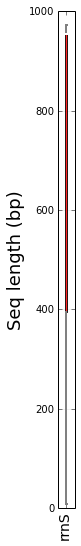

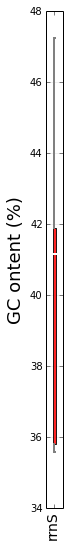

In [16]:
%matplotlib inline
pj.report_seq_stats()

In [17]:
pj.species_vs_loci('reptile_species_vs_locus_raw.csv')

In [18]:
!cat reptile_species_vs_locus_raw.csv

In [19]:
species=[]
for r in pj.records:
    source = [f for f in r.features if f.type == 'source'][0]
    species.append(" ".join(source.qualifiers['organism'][0].split()[0:2]))
    
#print set(species)
total=len(species)
species=list(set(species))

print "Total number of records: %i" %total
print "Number of species (see below for full list): %i" %len(species)
print species

Total number of records: 361
Number of species (see below for full list): 22
['Zootoca vivipara', 'Zamenis longissimus', 'Vipera berus', 'Caretta caretta', 'Podarcis muralis', 'Chrysemys picta', 'Anguis fragilis', 'Coronella austriaca', 'Lacerta viridis', 'Chelonia mydas', 'Xenopus laevis', 'Natrix natrix', 'Cottus gobio', 'Mus musculus', 'Eretmochelys imbricata', 'Lepidochelys kempii', 'Emys orbicularis', 'Mauremys caspica', 'Lacerta agilis', 'Chelydra serpentina', 'Dermochelys coriacea', 'Trachemys scripta']


In [20]:
def crop_to_CDS(record):
    """The function crops a Genbank record to only retain the sequence of the first CDS"""
    
    from Bio import SeqFeature
    
    strands=[]
    r = record
    print "\nprocessing record: '%s' " %r.id,
    if r.features:
        for feature in r.features:
            if feature.type == 'CDS':
                strands.append(feature.location.strand)
                gene_name = feature.qualifiers['gene'][0]
                r.seq = r.seq[feature.location.start:feature.location.end]
                feature.location = SeqFeature.FeatureLocation(SeqFeature.ExactPosition(0), 
                                                              SeqFeature.ExactPosition(feature.location.end - feature.location.start), 
                                                             1)
                break    
            elif feature.type == 'rRNA':
                strands.append(feature.location.strand)
                qualifiers = feature.qualifiers
                               
                if 'product' in qualifiers:
                    gene_name = feature.qualifiers['product'][0]
                    r.seq = r.seq[feature.location.start:feature.location.end]
                    feature.location = SeqFeature.FeatureLocation(SeqFeature.ExactPosition(0), 
                                                                  SeqFeature.ExactPosition(feature.location.end - feature.location.start), 
                                                                  1)
                    break
                elif 'gene' in qualifiers:
                    gene_name = feature.qualifiers['gene'][0]
                    r.seq = r.seq[feature.location.start:feature.location.end]
                    feature.location = SeqFeature.FeatureLocation(SeqFeature.ExactPosition(0), 
                                                                  SeqFeature.ExactPosition(feature.location.end - feature.location.start), 
                                                                  1)

                
        for feature in r.features:
            if feature.type == 'source':
                strands.append(feature.location.strand)
                feature.qualifiers['note'] = ['modified from original record: cropped to only CDS/rRNA '+str(gene_name)]
                feature.location = SeqFeature.FeatureLocation(SeqFeature.ExactPosition(0), 
                                                              SeqFeature.ExactPosition(len(r.seq)), 
                                                             feature.location.strand)
                break
                    
        if len(list(set(strands))) > 1:
            r.seq = r.seq.reverse_complement()
            print "\t.. reverse complementing",

        print "\t.. final length: %s" %len(r.seq),

    else:
        print "\t  no features found .."

    #print r.format('genbank')

In [21]:
for r in pj.records:
#    print r.format('genbank')
    crop_to_CDS(record=r)


processing record: 'NC_012431.1'  	.. final length: 941 
processing record: 'AJ001473.1'  	.. final length: 547 
processing record: 'AY151988.1'  	.. final length: 398 
processing record: 'AF316169.1'  	.. final length: 457 
processing record: 'KX080575.1'  	.. final length: 364 
processing record: 'HG802830.1'  	.. final length: 394 
processing record: 'NC_011573.1'  	.. final length: 969 
processing record: 'AJ001471.1'  	.. final length: 544 
processing record: 'JX454972.1'  	.. final length: 969 
processing record: 'GQ142072.1'  	.. final length: 459 
processing record: 'AY190305.1'  	.. final length: 911 
processing record: 'DQ658818.1'  	.. final length: 380 
processing record: 'HG802784.1'  	.. final length: 394 
processing record: 'HG802776.1'  	.. final length: 394 
processing record: 'AY151991.1'  	.. final length: 398 
processing record: 'HG802778.1'  	.. final length: 394 
processing record: 'KM401599.1'  	.. final length: 953 
processing record: 'AY122781.1'  	.. final le

Convert cleaned records to genbank and fasta format in order to perform vsearch and remove redundancy.

In [22]:
from Bio import SeqIO

temp=[]
for r in pj.records:
    temp.append(r)

out = open('reptile_12S_raw_cleaned.gb', 'w')
SeqIO.write(temp, out, 'genbank')
out.close()

out = open('reptile_12S_raw_cleaned.fa', 'w')
SeqIO.write(temp, out, 'fasta')
out.close()

print("Converted %i records" % len(temp))

del(temp)

Converted 361 records


Pickle the project.

In [23]:
pickle_pj(pj, 'rep_raw.pkl')

'rep_raw.pkl'

# Vsearch - remove redundancy

Remove redundancy by clustering the 12S rRNA sequences with vsearch.

In [24]:
!vsearch -threads 5 --cluster_fast reptile_12S_raw_cleaned.fa --strand both --uc 12S_id-1.uc --id 1 --query_cov 1

vsearch v1.1.0_linux_x86_64, 31.3GB RAM, 8 cores
https://github.com/torognes/vsearch

Reading file reptile_12S_raw_cleaned.fa 100%
256337 nt in 360 seqs, min 146, max 973, avg 712
Indexing sequences 100%
Masking 100%
Sorting by length 100%
Counting unique k-mers 100%
Clustering 100%
Writing clusters 100%
Clusters: 113 Size min 1, max 83, avg 3.2
Singletons: 63, 17.5% of seqs, 55.8% of clusters


In [25]:
pj = Project('reptile_target_locus.csv', pickle='rep_nr.pkl', git=False)

In [26]:
#pj = unpickle_pj('rep_nr.pkl', git=False)

In [27]:
pj.read_embl_genbank(['reptile_12S_raw_cleaned.gb'])

In [28]:
pj.extract_by_locus()

Distribution Of Sequence Lengths
Distribution Of Sequence Statistic "Gc_Content"


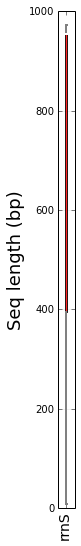

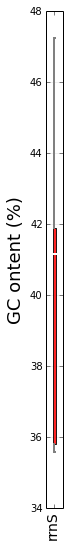

In [29]:
%matplotlib inline
pj.report_seq_stats()

In [30]:
species=[]
for r in pj.records:
    source = [f for f in r.features if f.type == 'source'][0]
    species.append(" ".join(source.qualifiers['organism'][0].split()[0:2]))
    
#print set(species)
total=len(species)
species=list(set(species))

print "Total number of records: %i" %total
print "Number of species (see below for full list): %i" %len(species)
print species

Total number of records: 361
Number of species (see below for full list): 22
['Zootoca vivipara', 'Zamenis longissimus', 'Vipera berus', 'Caretta caretta', 'Podarcis muralis', 'Chrysemys picta', 'Anguis fragilis', 'Coronella austriaca', 'Lacerta viridis', 'Chelonia mydas', 'Xenopus laevis', 'Natrix natrix', 'Cottus gobio', 'Mus musculus', 'Eretmochelys imbricata', 'Lepidochelys kempii', 'Emys orbicularis', 'Mauremys caspica', 'Lacerta agilis', 'Chelydra serpentina', 'Dermochelys coriacea', 'Trachemys scripta']


Extract ids of representative sequences identified by vsearch -> remove all others from the object.

In [31]:
ids = []

uc=open('12S_id-1.uc', 'r')

for line in uc:
    if line.startswith('C'):
        ids.append(line.split("\t")[8])
        
recs_to_keep = {'rrnS': ids}
recs_to_drop = {'rrnS': []}

for r in pj.records:
    if not r.id in recs_to_keep['rrnS']:
        recs_to_drop['rrnS'].append(r.id)
        
print "to drop: %s" %len(recs_to_drop['rrnS'])
print "to keep: %s" %len(recs_to_keep['rrnS'])

print "TOTAL: %s" %(len(recs_to_drop['rrnS']) + len(recs_to_keep['rrnS']))

to drop: 248
to keep: 113
TOTAL: 361


Exclude redundant records from object.

In [32]:
pj.exclude(start_from_max=False, **recs_to_drop)

In [33]:
species=[]
for r in pj.records:
    if r.id in recs_to_keep['rrnS']:
        source = [f for f in r.features if f.type == 'source'][0]
        species.append(" ".join(source.qualifiers['organism'][0].split()[0:2]))
    
#print set(species)
total=len(species)
species=list(set(species))

print "Total number of records: %i" %total
print "Number of species (see below for full list): %i" %len(species)
print species

Total number of records: 113
Number of species (see below for full list): 22
['Zootoca vivipara', 'Zamenis longissimus', 'Vipera berus', 'Caretta caretta', 'Podarcis muralis', 'Chrysemys picta', 'Anguis fragilis', 'Coronella austriaca', 'Lacerta viridis', 'Chelonia mydas', 'Xenopus laevis', 'Natrix natrix', 'Cottus gobio', 'Mus musculus', 'Eretmochelys imbricata', 'Lepidochelys kempii', 'Emys orbicularis', 'Mauremys caspica', 'Lacerta agilis', 'Chelydra serpentina', 'Dermochelys coriacea', 'Trachemys scripta']


Write short 12S rRNA sequences (< 400bp) to fasta file to build new alignment outside Reprophylo later in script using hmmbuild. The Hidden Markov Model alignment will include all 12S rRNA sequences - short and long.

In [34]:
temp_seq = []

for r in pj.records_by_locus['rrnS']:
    if len(r.seq) < 400:
        temp_seq.append(r)
        
total = len(temp_seq)
print "Total number of records: %i" %total

from Bio import SeqIO

out=open('reptile_short_to_align.fasta','w')
SeqIO.write(temp_seq, out, 'fasta')
out.close()

Total number of records: 33


# Filter by Length

Write cropped records (minimum length of 400bp) to Genbank file.

In [35]:
from Bio import SeqIO

temp=[]
for r in pj.records:
    if len(r.seq) >= 400:
        temp.append(r)

out = open('reptile12S_cropped_400bp.gb', 'w')
SeqIO.write(temp, out, 'genbank')
out.close()

out = open('reptile12S_cropped_400bp.fa', 'w')
SeqIO.write(temp, out, 'fasta')
out.close()


del(temp)

Pickle the project.

In [36]:
pickle_pj(pj, 'rep_nr.pkl')

'rep_nr.pkl'

Now view records in cropped genbank file.

In [37]:
for index, record in enumerate(SeqIO.parse("reptile12S_cropped_400bp.gb", "genbank")):
        print("index %i, ID = %s, length %i, with %i features"
          % (index, record.id, len(record.seq), len(record.features)))

index 0, ID = NC_012431.1, length 941, with 2 features
index 1, ID = AJ001473.1, length 547, with 2 features
index 2, ID = AF316169.1, length 457, with 2 features
index 3, ID = NC_011573.1, length 969, with 2 features
index 4, ID = AJ001471.1, length 544, with 2 features
index 5, ID = JX454972.1, length 969, with 2 features
index 6, ID = GQ142072.1, length 459, with 2 features
index 7, ID = AY190305.1, length 911, with 2 features
index 8, ID = KM401599.1, length 953, with 2 features
index 9, ID = AY122781.1, length 591, with 2 features
index 10, ID = KF781329.1, length 430, with 2 features
index 11, ID = JX454980.1, length 968, with 2 features
index 12, ID = JX454970.1, length 968, with 2 features
index 13, ID = NC_012398.1, length 968, with 2 features
index 14, ID = JX454976.1, length 969, with 2 features
index 15, ID = NC_016923.1, length 970, with 2 features
index 16, ID = AJ001480.1, length 543, with 2 features
index 17, ID = JX454974.1, length 969, with 2 features
index 18, ID = K

Now need to filter all 12S rRNA sequences within pj.records dictionary by length to remove all sequences shorter than 400bp within Reprophylo.

In [38]:
# Define minima and maxima

gc_inliers = {
    'rrnS': [35,48]
}
len_inliers = {
    'rrnS': [400,1000]
}


# Apply to loci data
for locus in gc_inliers:
    # trim GC outliers
    pj.filter_by_gc_content(locus,
                            min_percent_gc=gc_inliers[locus][0],
                            max_percent_gc=gc_inliers[locus][1])

    # trim length outlier
    pj.filter_by_seq_length(locus,
                            min_length=len_inliers[locus][0],
                            max_length=len_inliers[locus][1])

Confirm that the length filter has worked.

Distribution Of Sequence Lengths
Distribution Of Sequence Statistic "Gc_Content"


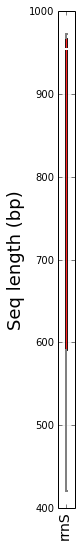

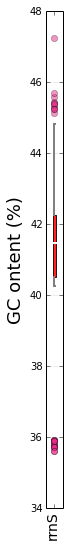

In [39]:
pj.report_seq_stats()

Pickle the project.

In [40]:
pickle_pj(pj, 'rep_nr.pkl')

'rep_nr.pkl'

# Long Alignment

Now, need to produce a sequence alignment file based on an alignment of all 12S sequences longer than 400bp. This will be done with the AlnConf class.

In [41]:
pj = unpickle_pj('rep_nr.pkl', git=False)

muscle default configuration:

In [42]:
muscle_defaults = AlnConf(pj,
                          method_name="muscleDefault",
                          program_name="muscle",
                          loci=['rrnS'])

muscle -in 248521477496123.26_rrnS.fasta


Once there are one or more AlnConf objects, they can be executed in one go using the Project method align. This method accepts a list of AlnConf objects and does whatever it is each of them tells it:

In [43]:
pj.align([muscle_defaults])

When the process is done, the AlnConf objects will be stored in pj.used_methods, which is a dictionary using the method names as keys. If you print one of these AlnConf objects as a string, you will get complete details about the process, including programme versions and references:

In [44]:
print pj.used_methods['muscleDefault']

AlnConf named muscleDefault with ID 248521477496123.26
Loci: rrnS 
Created on: Wed Oct 26 15:35:23 2016
Commands:
rrnS: muscle -in 248521477496123.26_rrnS.fasta

Environment:
Platform: Linux-4.4.0-38-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: MUSCLE v3.8.31\nPal2Nal v14
 Program reference:\nEdgar 2004: MUSCLE: multiple sequence alignment with high accuracy and high throughput. Nucleic Acids Research 32(5):1792-1797\nMikita Suyama
 David Torrents
 and Peer Bork (2006) PAL2NAL: robust conversion of protein sequence alignments into the corresponding codon alignments.Nucleic Acids Res. 34
 W609-W612.
execution time:
11.5761458874


Core Methods section sentence:
The dataset(s) rrnS were first ali

The alignment itself is stored in the pj.alignments dictionary, using keys that follow this pattern: locus_name@method_name where method_name is the name you have provided to your AlnConf object.

In [45]:
pj.alignments

{'rrnS@muscleDefault': <<class 'Bio.Align.MultipleSeqAlignment'> instance (80 records of length 1056, IUPACProtein()) at 7fc4b0d402d0>}

Alignment text files can be dumped in any AlignIO format for usage in an external command line or GUI program. When writing to files, you can control the header of the sequence by, for example, adding the organism name of the gene name, or by replacing the feature ID with the record ID.

In [46]:
# record_id and source_organism are feature qualifiers in the SeqRecord object
files = pj.write_alns(id=['record_id','source_organism'],
                      format='fasta')
files

['rrnS@muscleDefault_aln.fasta']

Pickle the project.

In [47]:
pickle_pj(pj, 'rep_nr.pkl')

'rep_nr.pkl'

# Build tree

The alignment needs to be trimmed to remove large gaps in sequences. The cell below contains the reprophylo solution for clipping the alignment - the default gappyout algorithm. With TrimalConf, instead of specifying loci names, we provide alignment names, as they appear in the keys of pj.alignments.

In [48]:
muscle_gappyout = TrimalConf(pj,                       # The Project

                            method_name='gappyout',  # Any unique string 
                                                     # ('gappyout' is default)
                            
                            program_name='trimal',   # No alternatives in 
                                                     # this ReproPhylo version
                            
                            cmd='default',           # the default is trimal. 
                                                     # Change it here
                                                     # or in pj.defaults['trimal']
                            
                            alns=['rrnS@muscleDefault'],  # 'all' by default
                            
                            trimal_commands={'gappyout': True} # By default, the gappyout algorithm is used.
                           )

trimal -in 908181477496153.25_rrnS@muscleDefault.fasta -gappyout


In [49]:
pj.trim([muscle_gappyout])

In [50]:
print pj.used_methods['gappyout']

TrimalConf named gappyout with ID 908181477496153.25
Alignments: rrnS@muscleDefault 
Created on: Wed Oct 26 15:35:53 2016
Commands:
rrnS@muscleDefault@gappyout: trimal -in 908181477496153.25_rrnS@muscleDefault.fasta -gappyout

Environment:Platform: Linux-4.4.0-38-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: trimAl 1.2rev59
 Program reference: Salvador Capella-Gutierrez; Jose M. Silla-Martinez; Toni Gabaldon. trimAl: a tool for automated alignment trimming in large-scale phylogenetic analyses. Bioinformatics 2009 25: 1972-1973.
execution time:
0.663233995438

Core Methods section sentence:
The alignment(s) rrnS@muscleDefault were trimmed using the program trimAl 1.2rev59 [1].

Reference:
Salvado

The trimmed alignments themselves are stored in the pj.trimmed_alignments dictionary, using keys.

In [51]:
pj.trimmed_alignments

{'rrnS@muscleDefault@gappyout': <<class 'Bio.Align.MultipleSeqAlignment'> instance (80 records of length 926, IUPACAmbiguousDNA()) at 7fc4b01ba0d0>}

Trimmed alignment text files can be dumped in any AlignIO format for usage in an external command line or GUI program. When writing to files, you can control the header of the sequence by, for example, adding the organism name of the gene name, or by replacing the feature ID with the record ID:

In [52]:
files = pj.write_trimmed_alns(id=['record_id','source_organism'],
                                   format='fasta')
files

['rrnS@muscleDefault@gappyout_trimmed_aln.fasta']

Infer Maximum Likelihood tree based on the clipped alignment. We are going to use RAxML. Configure RAxML for trimmed muscle alignment.

In [53]:
raxml = RaxmlConf(pj, method_name='raxml-muscleDefault-trimmed',
                  program_name='raxmlHPC-PTHREADS-SSE3',
                  keepfiles=True,
                  cmd='raxmlHPC-PTHREADS-SSE3',
                  preset='fa',
                  alns=['rrnS@muscleDefault@gappyout'],
                  model='GAMMA',
                  threads=5,
                  cline_args={'-#': 100})

raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 196061477496171.35_rrnS@muscleDefault@gappyout0 -p 601 -s 196061477496171.35_rrnS@muscleDefault@gappyout.fasta -T 5 -x 601 -N 100


In [54]:
pj.tree([raxml])

In [55]:
print pj.used_methods['raxml-muscleDefault-trimmed']

RaxmlConf named raxml-muscleDefault-trimmed with ID 196061477496171.35
Alignments: rrnS@muscleDefault@gappyout 
Created on: Wed Oct 26 15:36:11 2016
Commands:
rrnS@muscleDefault@gappyout:
raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 196061477496171.35_rrnS@muscleDefault@gappyout0 -p 601 -s 196061477496171.35_rrnS@muscleDefault@gappyout.fasta -T 5 -x 601 -N 100

Environment:
Platform: Linux-4.4.0-38-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: raxmlHPC-PTHREADS-SSE3RAxML version 8.0.12
 Program reference: A. Stamatakis: RAxML Version 8: A tool for Phylogenetic Analysis and Post-Analysis of Large Phylogenies. In Bioinformatics
 2014.
execution time:
238.359686136

Core Methods section sentence:
Phy

Pickle the project.

In [56]:
pickle_pj(pj, 'rep_nr.pkl')

'rep_nr.pkl'

# Visualise Tree

Now let's visualize the tree.

Prepare tree annotation:
- define outgroups
- specify support coloration

In [57]:
pj.add_qualifier_from_source('organism')

In [58]:
for species in ['Cottus','Mus','Xenopus']:
    pj.if_this_then_that(species, 'organism', 'outgroup', 'outgroup',
                         mode='part')

In [59]:
supports = {'black': [100,95],
            'dimgray': [95,75],
            'silver': [75,50]}

In [60]:
pj.clear_tree_annotations()

pj.annotate('.', 'outgroup', 'outgroup', 
            ['source_organism', 'record_id'], 
            node_support_dict=supports, multifurc=10,
            html='muscleDefault-trimmed-400bp-raxml.html')

Check trees out. Have a think which sequences you would consider mislabelled and should better be removed from the reference database.

Create a static copy of the tree (the last *.png with the expected alignment id) for later.

In [61]:
%%bash

last_png=$(ls -hlrt *rrnS@muscleDefault@gappyout.png | tail -n 1 | perl -ne 'chomp; @a=split(" "); print "$a[-1]"')
cp $last_png rrnS_muscleDefault-trimmed-400bp-raxml.png

**===========================================================================================**

# Format long alignment and sequence IDs

In [62]:
from reprophylo import *

In [63]:
pj = unpickle_pj('rep_nr.pkl', git=False)

- Identify the record IDs of the sequences shorter than 400bp
- Write these sequences for to new fasta file (make sure the sequece IDs are as Reprophylo expects them: 'id_f0')
- Prepare a hmm profile for the alignment the tree is built on (either muscle 'or mafft)

In [64]:
pj.alignments

{'rrnS@muscleDefault': <<class 'Bio.Align.MultipleSeqAlignment'> instance (80 records of length 1056, IUPACProtein()) at 7fc4b0580210>}

In [65]:
from Bio import AlignIO

out=open('400bp_reptile_align.fasta','w')

AlignIO.write(pj.fta('rrnS@muscleDefault'), out, 'fasta')

returning trimmed alignment object rrnS@muscleDefault@gappyout


1

Check number of records in file containing short 12S rRNA sequences.

In [66]:
from Bio import SeqIO

records = list(SeqIO.parse("reptile_short_to_align.fasta", "fasta"))
print("Total records: %i" % len(records))

Total records: 33


Check that record IDs are in format that reprophylo expects for alignment.

In [67]:
from Bio import SeqIO

short_seq = open("reptile_short_to_align.fasta", "rU")
sequences = []

for r in SeqIO.parse(short_seq, "fasta"):
    print(r.id)

AY151988.1_f0
KX080575.1_f0
HG802830.1_f0
AY151993.1_f0
HG802772.1_f0
DQ081074.1_f0
U81335.1_f0
KT030712.1_f0
EF027342.1_f0
AY151990.1_f0
FJ039991.1_f0
AB090021.1_f0
HG802786.1_f0
AY151992.1_f0
AF080277.1_f0
DQ081073.1_f0
AF080334.1_f0
HG802805.1_f0
U81329.1_f0
HQ681907.1_f0
AF080298.1_f0
KX694589.1_f0
HQ681908.1_f0
U81328.1_f0
U81340.1_f0
EU624267.1_f0
KT030713.1_f0
AB090043.1_f0
KX080601.1_f0
AF158461.1_f0
KX080576.1_f0
JQ287761.1_f0
M13046.1_f0


If record IDs were not in the format Reprophylo expects for tree construction, the code cells below could be used to format them to be 'id_f0'.

In [68]:
#temp_seq = []

#for r in pj.records:
    #if len(r.seq) < 400:
        #temp_seq.append(r)

#from Bio import SeqIO

#out=open('short_to_align.fasta','w')
#SeqIO.write(temp_seq, out, 'fasta')
#out.close()

In [69]:
#from Bio import SeqIO

#short_seq = open("short_to_align.fasta", "rU")
#sequences = []

#for r in SeqIO.parse(short_seq, "fasta"):
    #print(r.id)
    #r.description = r.id+'_f0'
    #r.id = r.description
    #print r.description
    #sequences.append(r)


#out = open("seq_to_align.fasta", "w")
#SeqIO.write(sequences, out, "fasta")
#out.close()

Check that sequences in reprophylo project have not been altered.

In [70]:
for r in pj.records:
    if len(r.seq) < 400:
        print r.id
        print r.description

AY151988.1
Podarcis muralis isolate E2106124 12S ribosomal RNA gene, partial sequence; mitochondrial gene for mitochondrial product.
KX080575.1
Podarcis muralis isolate 509 12S ribosomal RNA gene, partial sequence; mitochondrial.
HG802830.1
Emys orbicularis partial 12S rRNA gene, specimen voucher MTD:T:1488.
DQ658818.1
Lacerta agilis isolate AG 12S ribosomal RNA gene, partial sequence; mitochondrial.
HG802784.1
Emys orbicularis partial 12S rRNA gene, specimen voucher MTD:T:5570.
HG802776.1
Emys orbicularis partial 12S rRNA gene, specimen voucher MTD:T:3248.
AY151991.1
Podarcis muralis isolate E2106127 12S ribosomal RNA gene, partial sequence; mitochondrial gene for mitochondrial product.
HG802778.1
Emys orbicularis partial 12S rRNA gene, specimen voucher MTD:T:4095.
AY151993.1
Zootoca vivipara 12S ribosomal RNA gene, partial sequence; mitochondrial gene for mitochondrial product.
FJ039913.1
Dermochelys coriacea isolate DC_Atlantic 12S ribosomal RNA gene, partial sequence; mitochondrial

Pickle the project.

In [71]:
pickle_pj(pj, 'rep_nr.pkl')

'rep_nr.pkl'

# Feed short 12S rRNA sequences into long alignment

Previously, sequences shorter than 400bp were removed from the pj.records dictionary before a muscle alignment was performed. Short sequences can cause problems in global paired alignments when the alignment algorithm attempts to match them to much longer sequences.

Instead, we performed the long alignment of sequences longer than 400bp first and now we will attempt to incorporate the shorter sequences. This will be done using the hmmbuild command within the hmmer v3 program suite. to construct a Hidden Markov Model and produce a hmm file.

In [1]:
!hmmbuild -h #for help

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.1b1 (May 2013); http://hmmer.org/
# Copyright (C) 2013 Howard Hughes Medical Institute.
# Freely distributed under the GNU General Public License (GPLv3).
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Usage: hmmbuild [-options] <hmmfile_out> <msafile>

Basic options:
  -h     : show brief help on version and usage
  -n <s> : name the HMM <s>
  -o <f> : direct summary output to file <f>, not stdout
  -O <f> : resave annotated, possibly modified MSA to file <f>

Options for selecting alphabet rather than guessing it:
  --amino : input alignment is protein sequence data
  --dna   : input alignment is DNA sequence data
  --rna   : input alignment is RNA sequence data

Alternative model construction strategies:
  --fast           : assign cols w/ >= symfrac residues as consensus  [default]
  --hand           : manual construction (requires reference annotation)
  --symfrac <x>    :

In [2]:
!hmmbuild 12S_reptile_ref.hmm 400bp_reptile_align.fasta

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.1b1 (May 2013); http://hmmer.org/
# Copyright (C) 2013 Howard Hughes Medical Institute.
# Freely distributed under the GNU General Public License (GPLv3).
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             400bp_reptile_align.fasta
# output HMM file:                  12S_reptile_ref.hmm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen     W eff_nseq re/pos description
#---- -------------------- ----- ----- ----- ----- -------- ------ -----------
1     400bp_reptile_align     80   926   926  1122     2.74  0.450 

# CPU time: 0.36u 0.00s 00:00:00.36 Elapsed: 00:00:00.37


Now use hmmalign to align the short 12S rRNA sequences to the longer reference alignment.

In [3]:
!hmmalign -h #for help

# hmmalign :: align sequences to a profile HMM
# HMMER 3.1b1 (May 2013); http://hmmer.org/
# Copyright (C) 2013 Howard Hughes Medical Institute.
# Freely distributed under the GNU General Public License (GPLv3).
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Usage: hmmalign [-options] <hmmfile> <seqfile>

Basic options:
  -h     : show brief help on version and usage
  -o <f> : output alignment to file <f>, not stdout

Less common options:
  --mapali <f>    : include alignment in file <f> (same ali that HMM came from)
  --trim          : trim terminal tails of nonaligned residues from alignment
  --amino         : assert <seqfile>, <hmmfile> both protein: no autodetection
  --dna           : assert <seqfile>, <hmmfile> both DNA: no autodetection
  --rna           : assert <seqfile>, <hmmfile> both RNA: no autodetection
  --informat <s>  : assert <seqfile> is in format <s>: no autodetection
  --outformat <s> : output alignment in format <s>  [Stockholm]

Seque

In [4]:
%%bash

hmmalign -o 12S_reptile400bpref_plus_short_query.sto \
--mapali 400bp_reptile_align.fasta \
12S_reptile_ref.hmm reptile_short_to_align.fasta

The hmmalign command has produced a file containing a new alignment of all 12S rRNA sequences (long and short) in stockholm output format. This must be converted to a more useful file format such as fasta or GenBank using the Seq command in BioPython.

In [5]:
from Bio import AlignIO

input_file = open("12S_reptile400bpref_plus_short_query.sto", "rU")
output_file = open("12S_ReptileAlign_ALL.fasta", "w")

alignment = AlignIO.read(input_file, "stockholm")
count = len(alignment)
AlignIO.write(alignment, output_file, "fasta")

output_file.close()
input_file.close()
print("Converted %i records" % count)

Converted 113 records


# Tree Building

The fasta file containing the 12S rRNA reptile sequence alignment must now be converted into a format which can be used for alignment trimming. The alignment must be parsed to an alignment object, aln.

In [6]:
from reprophylo import *

In [7]:
pj=unpickle_pj('rep_nr.pkl', git=False)

DEBUG:Cloud:Log file (/root/.picloud/cloud.log) opened


In [8]:
from Bio import AlignIO
from Bio.Alphabet import generic_dna

aln = AlignIO.read(open("12S_reptile400bpref_plus_short_query.sto"), "stockholm", alphabet=generic_dna)
for r in aln:
    print(r.id + " is " + str(len(r)) + "bp")

EU543221.1_f0 is 1036bp
KX694573.1_f0 is 1036bp
AY122682.1_f0 is 1036bp
AY122780.1_f0 is 1036bp
AY122836.1_f0 is 1036bp
AB188189.1_f0 is 1036bp
FJ460597.1_f0 is 1036bp
AJ001471.1_f0 is 1036bp
AJ001469.1_f0 is 1036bp
AJ001472.1_f0 is 1036bp
AJ001470.1_f0 is 1036bp
AJ001468.1_f0 is 1036bp
GQ142072.1_f0 is 1036bp
KM401599.1_f0 is 1036bp
KF781329.1_f0 is 1036bp
AF149947.1_f0 is 1036bp
KC990830.1_f0 is 1036bp
AM176577.1_f0 is 1036bp
AJ001480.1_f0 is 1036bp
AF149959.1_f0 is 1036bp
AF149961.1_f0 is 1036bp
AF149958.1_f0 is 1036bp
AF149962.1_f0 is 1036bp
AF149960.1_f0 is 1036bp
EU443256.1_f0 is 1036bp
AY533105.1_f0 is 1036bp
KF781663.1_f0 is 1036bp
KF781660.1_f0 is 1036bp
KF781661.1_f0 is 1036bp
KF781662.1_f0 is 1036bp
AY057792.1_f0 is 1036bp
AY012114.1_f0 is 1036bp
JX945964.1_f0 is 1036bp
V00665.1_f0 is 1036bp
X84382.1_f0 is 1036bp
AY057793.1_f0 is 1036bp
DQ874614.2_f0 is 1036bp
KF781653.1_f0 is 1036bp
KF781656.1_f0 is 1036bp
KF781654.1_f0 is 1036bp
AY057791.1_f0 is 1036bp
M10217.1_f0 is 1036b

In [9]:
pj.alignments['rrnS@reptile_align_allseq'] = aln

In [10]:
pj.alignments

{'rrnS@muscleDefault': <<class 'Bio.Align.MultipleSeqAlignment'> instance (80 records of length 1056, IUPACProtein()) at 7f94b5975390>,
 'rrnS@reptile_align_allseq': <<class 'Bio.Align.MultipleSeqAlignment'> instance (113 records of length 1036, DNAAlphabet()) at 7f94b5b9a490>}

In [11]:
pj.alignments.keys()

['rrnS@reptile_align_allseq', 'rrnS@muscleDefault']

The alignment needs trimming and removal of gaps within sequences. The cell below contains the reprophylo solution for clipping the alignment - the default gappyout algorithm.

With TrimalConf, instead of specifying loci names, we provide alignment names, as they appear in the keys of pj.alignments.

In [12]:
gappyout = TrimalConf(pj,                      # The Project

                      method_name='gappyout',  # Any unique string 
                                               # ('gappyout' is default)

                      program_name='trimal',   # No alternatives in 
                                               # this ReproPhylo version

                      cmd='default',           # the default is trimal. 
                                               # Change it here
                                               # or in pj.defaults['trimal']

                      alns=['rrnS@reptile_align_allseq'],# 'all' by default

                      trimal_commands={'gappyout': True} # By default, the gappyout algorithm is used.
                      )

trimal -in 985621477496703.64_rrnS@reptile_align_allseq.fasta -gappyout


In [13]:
pj.trim([gappyout])

In [14]:
print pj.used_methods['gappyout']

TrimalConf named gappyout with ID 985621477496703.64
Alignments: rrnS@reptile_align_allseq 
Created on: Wed Oct 26 15:45:03 2016
Commands:
rrnS@reptile_align_allseq@gappyout: trimal -in 985621477496703.64_rrnS@reptile_align_allseq.fasta -gappyout

Environment:Platform: Linux-4.4.0-38-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: trimAl 1.2rev59
 Program reference: Salvador Capella-Gutierrez; Jose M. Silla-Martinez; Toni Gabaldon. trimAl: a tool for automated alignment trimming in large-scale phylogenetic analyses. Bioinformatics 2009 25: 1972-1973.
execution time:
0.930802106857

Core Methods section sentence:
The alignment(s) rrnS@reptile_align_allseq were trimmed using the program trimAl 1.2re

The trimmed alignments themselves are stored in the pj.trimmed_alignments dictionary, using keys.

In [15]:
pj.trimmed_alignments

{'rrnS@muscleDefault@gappyout': <<class 'Bio.Align.MultipleSeqAlignment'> instance (80 records of length 926, IUPACAmbiguousDNA()) at 7f94b64d8810>,
 'rrnS@reptile_align_allseq@gappyout': <<class 'Bio.Align.MultipleSeqAlignment'> instance (113 records of length 926, IUPACAmbiguousDNA()) at 7f94b5bab5d0>}

Trimmed alignment text files can be dumped in any AlignIO format for usage in an external command line or GUI program. When writing to files, you can control the header of the sequence by, for example, adding the organism name of the gene name, or by replacing the feature ID with the record ID:

In [16]:
files = pj.write_trimmed_alns(id=['record_id','source_organism'],
                                   format='fasta')
files

['rrnS@reptile_align_allseq@gappyout_trimmed_aln.fasta',
 'rrnS@muscleDefault@gappyout_trimmed_aln.fasta']

Write clipped alignment to file for downstream taxonomic curation using SATIVA.

In [17]:
from Bio import AlignIO

clipped_aln = pj.trimmed_alignments["rrnS@reptile_align_allseq@gappyout"]

In [18]:
out=open('trimmed_reptile_align_ALL.phy', 'w')
AlignIO.write(clipped_aln, out, 'phylip-relaxed')
out.close()

SATIVA requires a taxonomic file that has been generated from a genbank file containing all record IDs included in the trimmed alignment.

First, the alignment must be parsed in fasta format and record IDs altered to contain only the ID as entered on genbank e.g. EU116957.1

Next, the record IDs must be extracted from the trimmed alignment file.

In [19]:
from Bio import AlignIO
from Bio.Alphabet import generic_dna

input_file = AlignIO.read(open("rrnS@reptile_align_allseq@gappyout_trimmed_aln.fasta"), "fasta")#, alphabet=generic_dna)

to_keep = []

for r in input_file:
    record_id = "_".join(r.id.split("_")[:-1])
    print record_id
    to_keep.append(record_id)

EU543221.1
KX694573.1
AY122682.1
AY122780.1
AY122836.1
AB188189.1
FJ460597.1
AJ001471.1
AJ001469.1
AJ001472.1
AJ001470.1
AJ001468.1
GQ142072.1
KM401599.1
KF781329.1
AF149947.1
KC990830.1
AM176577.1
AJ001480.1
AF149959.1
AF149961.1
AF149958.1
AF149962.1
AF149960.1
EU443256.1
AY533105.1
KF781663.1
KF781660.1
KF781661.1
KF781662.1
AY057792.1
AY012114.1
JX945964.1
V00665.1
X84382.1
AY057793.1
DQ874614.2
KF781653.1
KF781656.1
KF781654.1
AY057791.1
M10217.1
Y10943.1
AY581639.1
M27605.1
AY581648.1
AY581640.1
AY581644.1
AY581638.1
HQ442366.1
KC692465.1
JN999703.2
KF874616.1
AF069423.1
GU477770.1
L28077.1
KM216749.1
KM216748.1
FJ392294.1
EF122793.1
JN860636.1
GU477775.1
JX454969.1
JX454972.1
AB012104.1
JX454990.1
AY770536.1
JX454976.1
JX454971.1
DQ533485.1
JX454986.1
JX454980.1
JX454970.1
KP221806.1
JX454981.1
KP256531.1
JX454984.1
JX454983.1
AY770537.1
JX454977.1
AY151988.1
KX080575.1
HG802830.1
AY151993.1
HG802772.1
DQ081074.1
U81335.1
KT030712.1
EF027342.1
AY151990.1
FJ039991.1
AB090021.1
HG

You must create an empty list in which the record IDs in pj.records that match the record IDs from the trimmed alignment can be stored and then written out in a reduced genbank file.

In [20]:
out_gb = []

for r in pj.records:
    if r.id in to_keep:
        out_gb.append(r)

for r in out_gb:
    print r.id
    
out = open("12S_preSATIVA_reptiles.gb", "w")
SeqIO.write(out_gb, out, "genbank")
out.close()

AY151988.1
KX080575.1
HG802830.1
AJ001471.1
JX454972.1
GQ142072.1
KM401599.1
KF781329.1
JX454980.1
AY151993.1
JX454970.1
JX454976.1
AJ001480.1
HG802772.1
AF149947.1
KP221806.1
DQ081074.1
U81335.1
L28077.1
KT030712.1
JX454990.1
AJ001472.1
EF027342.1
AJ001470.1
AY151990.1
AF149962.1
FJ039991.1
AY770536.1
AB090021.1
JX454983.1
HG802786.1
AY151992.1
AF149960.1
KF874616.1
AF080277.1
EF122793.1
JX454981.1
HQ442366.1
JX454986.1
DQ081073.1
AF080334.1
HG802805.1
U81329.1
KX694573.1
GU477775.1
HQ681907.1
KP256531.1
KM216749.1
AY122682.1
AF149959.1
AF069423.1
AY770537.1
JX454969.1
FJ392294.1
AF080298.1
AF149961.1
JX454984.1
DQ533485.1
KC990830.1
EU443256.1
FJ460597.1
JN999703.2
KX694589.1
HQ681908.1
AJ001468.1
U81328.1
JN860636.1
EU543221.1
U81340.1
AM176577.1
KC692465.1
JX454971.1
AY122780.1
AF149958.1
EU624267.1
KT030713.1
AB012104.1
AB090043.1
AY122836.1
JX454977.1
KX080601.1
AF158461.1
AJ001469.1
GU477770.1
KX080576.1
KM216748.1
KF781663.1
KF781656.1
AY012114.1
AY581648.1
M10217.1
KF781660.1


How to run SATIVA is described in a different notebook. It may be a good strategy to set this going now in a separate notebook. Then continue onwards in this notebook.

**===============================================================================================**

Infer Maximum Likelihood tree based on the clipped alignment. We are going to use RAxML.

Configure RAxML.

In [21]:
raxml = RaxmlConf(pj, method_name='raxml-muscleDefault-trimmed',
                  program_name='raxmlHPC-PTHREADS-SSE3',
                  keepfiles=True,
                  cmd='raxmlHPC-PTHREADS-SSE3',
                  preset='fa',
                  alns=['rrnS@reptile_align_allseq@gappyout'],
                  model='GAMMA',
                  threads=5,
                  cline_args={'-#': 100})

raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 880361477496748.45_rrnS@reptile_align_allseq@gappyout0 -p 114 -s 880361477496748.45_rrnS@reptile_align_allseq@gappyout.fasta -T 5 -x 831 -N 100


In [22]:
pj.tree([raxml])

In [23]:
print pj.used_methods['raxml-muscleDefault-trimmed']

RaxmlConf named raxml-muscleDefault-trimmed with ID 880361477496748.45
Alignments: rrnS@reptile_align_allseq@gappyout 
Created on: Wed Oct 26 15:45:48 2016
Commands:
rrnS@reptile_align_allseq@gappyout:
raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 880361477496748.45_rrnS@reptile_align_allseq@gappyout0 -p 114 -s 880361477496748.45_rrnS@reptile_align_allseq@gappyout.fasta -T 5 -x 831 -N 100

Environment:
Platform: Linux-4.4.0-38-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: raxmlHPC-PTHREADS-SSE3RAxML version 8.0.12
 Program reference: A. Stamatakis: RAxML Version 8: A tool for Phylogenetic Analysis and Post-Analysis of Large Phylogenies. In Bioinformatics
 2014.
execution time:
466.439891815

Core M

In [24]:
pj.trees.keys()

['rrnS@muscleDefault@gappyout@raxml-muscleDefault-trimmed',
 'rrnS@reptile_align_allseq@gappyout@raxml-muscleDefault-trimmed']

Pickle the project.

In [25]:
pickle_pj(pj, 'rep_nr.pkl')

'rep_nr.pkl'

# Visualise tree

Now let's visualize the tree.

Prepare tree annotation:
 - define outgroups
 - specify support coloration

In [26]:
pj.add_qualifier_from_source('organism')

In [27]:
for species in ['Cottus','Mus','Xenopus']:
    pj.if_this_then_that(species, 'organism', 'outgroup', 'outgroup',
                         mode='part')

In [28]:
supports = {'black': [100,95],
            'dimgray': [95,75],
            'silver': [75,50]}

In [29]:
pj.clear_tree_annotations()
pj.annotate('.', 'outgroup', 'outgroup', 
            ['source_organism', 'record_id'], 
            node_support_dict=supports, multifurc=10,
            html='muscleDefault-trimmed-reptile-all-raxml.html')

Check tree out. Have a think which sequences you would consider mislabelled and should better be removed from the reference database.

Create a static copy of the tree (the last *.png with the expected alignment id) for later.

In [30]:
%%bash

last_png=$(ls -hlrt *rrnS@reptile_align_allseq@gappyout.png | tail -n 1 | perl -ne 'chomp; @a=split(" "); print "$a[-1]"')
cp $last_png rrnS_muscleDefault-trimmed-reptile-all-raxml.png

**========================================================================================**

In the meantime we have run SATIVA on the alignment that was the basis of the above tree.

Now we are going to highlight the records that SATIVA considers mislabelled in the tree. We are also going to add a heatmap to the tree illustrating the confidence that SATIVA has in a given call.

Parse SATIVA output and record putatively mislabelled sequence records and the confidence of the call.

In [31]:
rec_mislabelled = {}
sativa=open('../SATIVA/12S.mis', 'r')

for line in sativa:
    if not line.startswith(";"):
        rec_mislabelled[line.split("\t")[0]] = line.split("\t")[4]

Add two new qualifiers containing info about the SATIVA results to the sequence features.

In [32]:
for r in pj.records:
    if r.id in rec_mislabelled:
        for f in r.features:
            f.qualifiers['mislabeled'] = ['yes']
            f.qualifiers['mislabeled_conf'] = [rec_mislabelled[r.id]]
    else:
        for f in r.features:
            f.qualifiers['mislabeled'] = ['no']
            f.qualifiers['mislabeled_conf'] = [0.0001]

In [33]:
pj.propagate_metadata()

Prepare tree annotation:

 - color records that were identified by SATIVA as being mislabelled.
 - add heatmap with mislabel confidence

In [34]:
leaf_colors = {'yes':'red', 'no': 'black'}
bg_colors = {'yes':'red', 'no': 'white'}

In [35]:
pj.clear_tree_annotations()
pj.annotate('.', 'outgroup', 'outgroup', 
            ['source_organism', 'record_id'], 
            node_support_dict=supports, multifurc=10,
            html='rrnS_muscleDefault-trimmed-reptile-all-raxml-SATIVA.html',
            fsize=13,
            heat_map_meta = ['mislabeled_conf'], heat_map_colour_scheme = 1,
            leaf_node_color_meta = 'mislabeled', leaf_label_colors = leaf_colors)

In [36]:
%%bash

last_png=$(ls -hlrt *rrnS@reptile_align_allseq@gappyout.png | tail -n 1 | perl -ne 'chomp; @a=split(" "); print "$a[-1]"')
cp $last_png rrnS_muscleDefault_trimmed_reptile_all_raxml_SATIVA_leaf_colored.png